<a href="https://colab.research.google.com/github/SaharFallah99/SVM/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(r'C:\Users\Asus\Desktop\insurance_claims.csv')

In [ ]:
pd.DataFrame(df)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


# preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [ ]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [ ]:
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
print(df.apply(lambda col: col.unique()))

months_as_customer             [328, 228, 134, 256, 137, 165, 27, 212, 235, 4...
age                            [48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 3...
policy_number                  [521585, 342868, 687698, 227811, 367455, 10459...
policy_bind_date               [17-10-2014, 27-06-2006, 06-09-2000, 25-05-199...
policy_state                                                        [OH, IN, IL]
policy_csl                                          [250/500, 100/300, 500/1000]
policy_deductable                                              [1000, 2000, 500]
policy_annual_premium          [1406.91, 1197.22, 1413.14, 1415.74, 1583.91, ...
umbrella_limit                 [0, 5000000, 6000000, 4000000, 3000000, 800000...
insured_zip                    [466132, 468176, 430632, 608117, 610706, 47845...
insured_sex                                                       [MALE, FEMALE]
insured_education_level        [MD, PhD, Associate, Masters, High School, Col...
insured_occupation          

In [ ]:
df[df['police_report_available']=='?']

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,1,?,42300,4700,4700,32900,Saab,92x,1996,N
10,235,42,543610,26-05-2002,OH,100/300,500,1253.12,4000000,462283,...,2,?,87010,7910,15820,63280,Ford,F150,2002,N
20,460,62,183430,25-06-2002,IN,250/500,1000,1187.96,4000000,618845,...,0,?,47160,0,5240,41920,Suburu,Impreza,2011,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,22,21,550127,04-07-2007,IN,250/500,1000,1248.05,0,443550,...,2,?,53280,5920,0,47360,Chevrolet,Malibu,2015,N
993,124,28,674570,08-12-2001,OH,250/500,1000,1235.14,0,443567,...,1,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N


In [ ]:
df[df['property_damage']=='?']

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
16,70,26,558938,08-06-2005,OH,500/1000,1000,1199.44,5000000,619884,...,2,YES,52110,5790,5790,40530,Nissan,Maxima,2012,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,124,28,674570,08-12-2001,OH,250/500,1000,1235.14,0,443567,...,1,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N
994,141,30,681486,24-03-2007,IN,500/1000,1000,1347.04,0,430665,...,2,YES,6480,540,1080,4860,Honda,Civic,1996,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [ ]:
df[df['collision_type']=='?']

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
13,121,34,626808,26-10-2012,OH,100/300,1000,936.61,0,464652,...,1,NO,7280,1120,1120,5040,Toyota,Highlander,2010,N
26,257,43,863236,20-09-1990,IN,100/300,2000,1322.10,0,436984,...,3,YES,9020,1640,820,6560,Toyota,Camry,2005,N
27,202,34,608513,18-07-2002,IN,100/300,500,848.07,3000000,607730,...,1,?,5720,1040,520,4160,Suburu,Forrestor,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,163,37,390256,25-11-2009,IN,500/1000,1000,1200.33,4000000,477631,...,1,YES,3900,390,780,2730,Volkswagen,Jetta,2008,Y
969,398,55,844062,25-05-1990,OH,250/500,500,862.19,0,606858,...,3,?,6600,600,1200,4800,Accura,MDX,2012,N
983,17,39,774895,28-10-2006,IL,250/500,1000,840.95,0,431202,...,1,?,3440,430,430,2580,Suburu,Legacy,2002,N
994,141,30,681486,24-03-2007,IN,500/1000,1000,1347.04,0,430665,...,2,YES,6480,540,1080,4860,Honda,Civic,1996,N


In [ ]:
df['collision_type'].replace('?','unknown',inplace=True)
df['police_report_available'].replace('?','unknown',inplace=True)
df['property_damage'].replace('?','unknown',inplace=True)

In [ ]:
df['collision_type'].unique()

array(['Side Collision', 'unknown', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [ ]:
df['police_report_available'].unique()

array(['YES', 'unknown', 'NO'], dtype=object)

In [ ]:
df['property_damage'].unique()

array(['YES', 'unknown', 'NO'], dtype=object)

In [ ]:
df=df.drop(['insured_zip','insured_hobbies','months_as_customer','auto_year','auto_model','policy_number','auto_make'],axis=1)

In [ ]:
df.head()

,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,48,17-10-2014,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,42,27-06-2006,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,1,unknown,0,0,unknown,5070,780,780,3510,Y
2,29,06-09-2000,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,41,25-05-1990,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,1,unknown,1,2,NO,63400,6340,6340,50720,Y
4,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [ ]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])

In [ ]:
df['policy_bind_date']=df['policy_bind_date'].apply(lambda x:x.year)

In [ ]:
df['incident_date']=pd.to_datetime(df['incident_date'])

In [ ]:
df['incident_date']=df['incident_date'].apply(lambda x:x.year)

In [ ]:
df.head()

,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,48,2014,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,42,2006,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,1,unknown,0,0,unknown,5070,780,780,3510,Y
2,29,2000,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,41,1990,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,1,unknown,1,2,NO,63400,6340,6340,50720,Y
4,44,2014,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [ ]:
print(df.apply(lambda col: col.unique()))

age                            [48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 3...
policy_bind_date               [2014, 2006, 2000, 1990, 1997, 2011, 2002, 199...
policy_state                                                        [OH, IN, IL]
policy_csl                                          [250/500, 100/300, 500/1000]
policy_deductable                                              [1000, 2000, 500]
policy_annual_premium          [1406.91, 1197.22, 1413.14, 1415.74, 1583.91, ...
umbrella_limit                 [0, 5000000, 6000000, 4000000, 3000000, 800000...
insured_sex                                                       [MALE, FEMALE]
insured_education_level        [MD, PhD, Associate, Masters, High School, Col...
insured_occupation             [craft-repair, machine-op-inspct, sales, armed...
insured_relationship           [husband, other-relative, own-child, unmarried...
capital-gains                  [53300, 0, 35100, 48900, 66000, 38400, 52800, ...
capital-loss                

In [ ]:
df=pd.get_dummies(df,columns=['insured_sex','insured_education_level','policy_state','policy_csl','insured_occupation','insured_relationship','incident_type','collision_type','incident_severity','incident_state','incident_city','incident_location','property_damage','police_report_available','authorities_contacted'],drop_first=True)

In [ ]:
df.head()

,age,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_date,incident_hour_of_the_day,number_of_vehicles_involved,...,incident_location_9980 Lincoln Ave,incident_location_9988 Rock Ridge,property_damage_YES,property_damage_unknown,police_report_available_YES,police_report_available_unknown,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,48,2014,1000,1406.91,0,53300,0,2015,5,1,...,0,0,1,0,1,0,0,0,0,1
1,42,2006,2000,1197.22,5000000,0,0,2015,8,1,...,0,0,0,1,0,1,0,0,0,1
2,29,2000,2000,1413.14,5000000,35100,0,2015,7,3,...,0,0,0,0,0,0,0,0,0,1
3,41,1990,2000,1415.74,6000000,48900,-62400,2015,5,1,...,0,0,0,1,0,0,0,0,0,1
4,44,2014,1000,1583.91,6000000,66000,-46000,2015,20,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord_f=OrdinalEncoder()
df['fraud_reported']=ord_f.fit_transform(df[['fraud_reported']])

In [ ]:
df['fraud_reported']

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: fraud_reported, Length: 1000, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

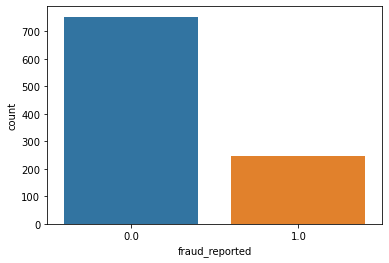

In [ ]:
sns.countplot(df['fraud_reported'])

In [ ]:
df['fraud_reported'].value_counts()

0.0    753
1.0    247
Name: fraud_reported, dtype: int64

# Separate x and y

In [ ]:
x=df.drop(['fraud_reported'],axis=1)

In [ ]:
y=df['fraud_reported']

In [ ]:
x

,age,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_date,incident_hour_of_the_day,number_of_vehicles_involved,...,incident_location_9980 Lincoln Ave,incident_location_9988 Rock Ridge,property_damage_YES,property_damage_unknown,police_report_available_YES,police_report_available_unknown,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,48,2014,1000,1406.91,0,53300,0,2015,5,1,...,0,0,1,0,1,0,0,0,0,1
1,42,2006,2000,1197.22,5000000,0,0,2015,8,1,...,0,0,0,1,0,1,0,0,0,1
2,29,2000,2000,1413.14,5000000,35100,0,2015,7,3,...,0,0,0,0,0,0,0,0,0,1
3,41,1990,2000,1415.74,6000000,48900,-62400,2015,5,1,...,0,0,0,1,0,0,0,0,0,1
4,44,2014,1000,1583.91,6000000,66000,-46000,2015,20,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,1991,1000,1310.80,0,0,0,2015,20,1,...,0,0,1,0,0,1,1,0,0,0
996,41,2014,1000,1436.79,0,70900,0,2015,23,1,...,0,0,1,0,0,1,1,0,0,0
997,34,2003,500,1383.49,3000000,35100,0,2015,4,3,...,0,0,0,1,1,0,0,0,0,1
998,62,2011,2000,1356.92,5000000,0,0,2015,2,1,...,0,0,0,1,1,0,0,0,1,0


# Scale

# Model Making

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
scaler_f= preprocessing.MinMaxScaler()
x_train = pd.DataFrame(scaler_f.fit_transform(x_train.values), columns=x_train.columns, index=x_train.index)
x_test = pd.DataFrame(scaler_f.fit_transform(x_test.values), columns=x_test.columns, index=x_test.index)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler()
x_train_under, y_train_under = under_sampler.fit_sample(x_train, y_train)

In [ ]:
from collections import Counter

In [ ]:
print(sorted(Counter(y_train_under).items()),y_train_under.shape)

[(0.0, 167), (1.0, 167)] (334,)


In [ ]:
from sklearn.svm import SVC
model=SVC()

In [ ]:
model.fit(x_train_under,y_train_under)

SVC()

In [ ]:
pred=model.predict(x_test)

In [ ]:
v=pd.DataFrame({'Label':y_test,'Predictions':pred})

In [ ]:
v

,Label,Predictions
521,0.0,0.0
737,0.0,0.0
740,0.0,1.0
660,0.0,0.0
411,0.0,0.0
...,...,...
468,0.0,0.0
935,1.0,0.0
428,1.0,1.0
7,0.0,0.0


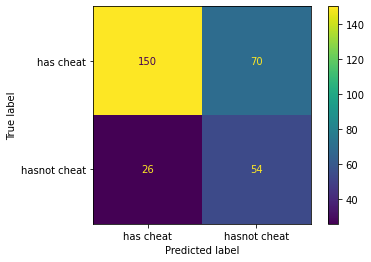

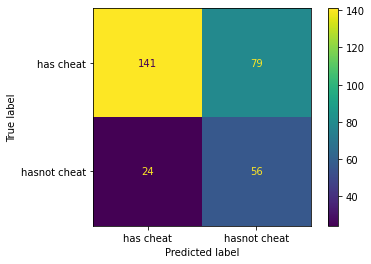

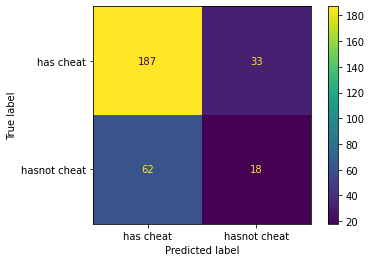

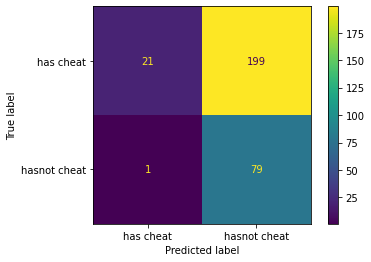

In [ ]:
from sklearn.metrics import plot_confusion_matrix
for kernel in ('linear','poly','rbf','sigmoid'):
    clf=SVC(kernel=kernel,gamma=2)
    clf.fit(x_train_under,y_train_under)
    pred=clf.predict(x_test)
    plot_confusion_matrix(clf,x_test, y_test,display_labels=['has cheat','hasnot cheat'])

In [ ]:
v[v['Label'] != v['Predictions']]

,Label,Predictions
740,0.0,1.0
626,0.0,1.0
513,1.0,0.0
280,0.0,1.0
101,0.0,1.0
...,...,...
797,0.0,1.0
290,0.0,1.0
449,0.0,1.0
501,0.0,1.0


In [ ]:
from sklearn.metrics import f1_score,roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [ ]:
def generate_model_report(y_test,pred):
    print('accuracy:',accuracy_score(y_test,pred))
    print('precision:',precision_score(y_test,pred))
    print('recall:',recall_score(y_test,pred))
    print('f1_score:',f1_score(y_test,pred))
    pass

In [ ]:
generate_model_report(y_test,pred)

accuracy: 0.3333333333333333
precision: 0.2841726618705036
recall: 0.9875
f1_score: 0.441340782122905


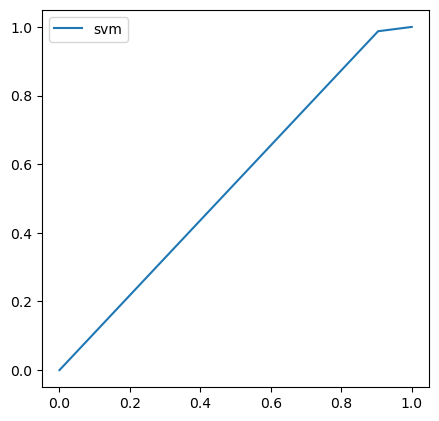

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(y_test,pred)
auc=auc(fpr,tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label='svm')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

         0.0       0.10      0.95      0.17        22
         1.0       0.99      0.28      0.44       278

    accuracy                           0.33       300
   macro avg       0.54      0.62      0.31       300
weighted avg       0.92      0.33      0.42       300



In [ ]:
param_grid=[{'C':[0.5,1,10,100],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}]

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(x_train_under,y_train_under)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.5, gamma=1, kernel=rbf, score=0.493, total=   0.1s
[CV] C=0.5, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.5, gamma=1, kernel=rbf, score=0.493, total=   0.1s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.5, gamma=1, kernel=rbf, score=0.493, total=   0.1s
[CV] C=0.5, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .......... C=0.5, gamma=1, kernel=rbf, score=0.493, total=   0.1s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.5, gamma=1, kernel=rbf, score=0.530, total=   0.1s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.5, gamma=0.1, kernel=rbf, score=0.776, total=   0.2s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.5, gamma=0.1, kernel=rbf, score=0.731, total=   0.1s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.5, gamma=0.1, kernel=rbf, score=0.627, total=   0.2s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.5, gamma=0.1, kernel=rbf, score=0.761, total=   0.1s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.5, gamma=0.1, kernel=rbf, score=0.758, total=   0.1s
[CV] C=0.5, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.746, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.746, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.742, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.791, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.701, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.627, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.746, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.1s finished


GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             verbose=3)

# Best parrameter

In [ ]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=10, gamma=0.01)

In [ ]:
# from sklearn.decomposition import PCA
# pca=PCA(n_components=0.95)
# x_scaled=pca.fit_transform(scaler_f)

In [ ]:
optimal_params=GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy',verbose=0)

In [ ]:
optimal_params=optimal_params.fit(x_train_under,y_train_under)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
model2=SVC(C=10,kernel='rbf', gamma=0.01,random_state=42)
model2=model2.fit(x_train_under,y_train_under)
pred2=model2.predict(x_test)

In [ ]:
v2=pd.DataFrame({'Label':y_test,'Predictions':pred2})

In [ ]:
v2

,Label,Predictions
521,0.0,0.0
737,0.0,0.0
740,0.0,0.0
660,0.0,0.0
411,0.0,0.0
...,...,...
468,0.0,0.0
935,1.0,0.0
428,1.0,1.0
7,0.0,0.0


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,pred2))

[[166  54]
 [ 24  56]]


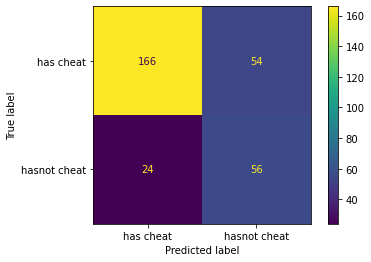

In [ ]:
plot_confusion_matrix(model2,x_test,y_test,display_labels=['has cheat','hasnot cheat'])

In [ ]:
pred2=grid.predict(x_test)

In [ ]:
v2=pd.DataFrame({'Label':y_test,'Predictions':pred2})

In [ ]:
v2

,Label,Predictions
521,0.0,0.0
737,0.0,0.0
740,0.0,0.0
660,0.0,0.0
411,0.0,0.0
...,...,...
468,0.0,0.0
935,1.0,0.0
428,1.0,1.0
7,0.0,0.0


In [ ]:
print(grid.score(x_test,y_test))

0.74


In [ ]:
print(confusion_matrix(pred2,y_test))

[[166  24]
 [ 54  56]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pred2,y_test))

              precision    recall  f1-score   support

         0.0       0.75      0.87      0.81       190
         1.0       0.70      0.51      0.59       110

    accuracy                           0.74       300
   macro avg       0.73      0.69      0.70       300
weighted avg       0.73      0.74      0.73       300



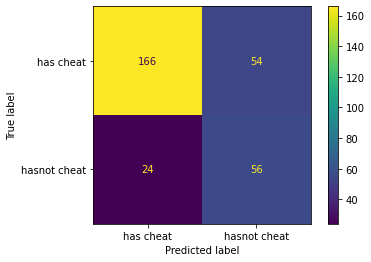

In [ ]:
plot_confusion_matrix(grid,x_test, y_test,display_labels=['has cheat','hasnot cheat'])

In [ ]:
print(grid.score(x_test,y_test))

0.74


In [ ]:
v2[v2['Label'] != v2['Predictions']]

,Label,Predictions
626,0.0,1.0
280,0.0,1.0
101,0.0,1.0
986,1.0,0.0
370,0.0,1.0
...,...,...
196,1.0,0.0
290,0.0,1.0
449,0.0,1.0
501,0.0,1.0


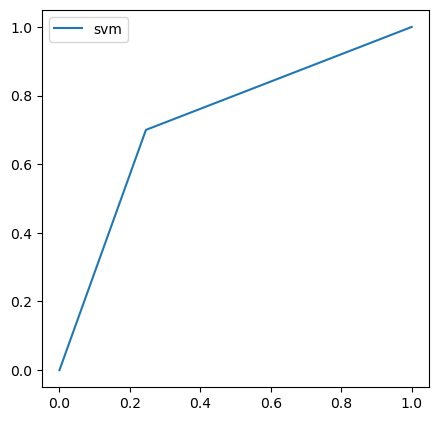

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(y_test,pred2)
auc=auc(fpr,tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label='svm')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
pca=PCA( )
x_train_pca=pca.fit_transform(x_train_under)
train_pc1_coords=x_train_pca[:,0]
train_pc2_coords=x_train_pca[:,1]
pca_train_scaled=scale(np.column_stack((train_pc1_coords,train_pc2_coords)))
param_grid=[{
    'C':[1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']
},]
optimal_params.fit(pca_train_scaled,y_train_under)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
clf_svm=SVC(random_state=42,C=0.5,gamma=0.1)
clf_svm.fit(pca_train_scaled,y_train_under)
x_test_pca=pca.transform(x_train_under)
test_pc1_coords=x_test_pca[:,0]
test_pc2_coords=x_test_pca[:,1]
x_min=test_pc1_coords.min()-1
x_max=test_pc1_coords.max()+1
y_min=test_pc2_coords.min()-1
y_max=test_pc2_coords.max()+1
xx,yy=np.meshgrid(np.arange(start=x_min,stop=x_max,step=0.1),
                 np.arange(start=y_min,stop=y_max,step=0.1))

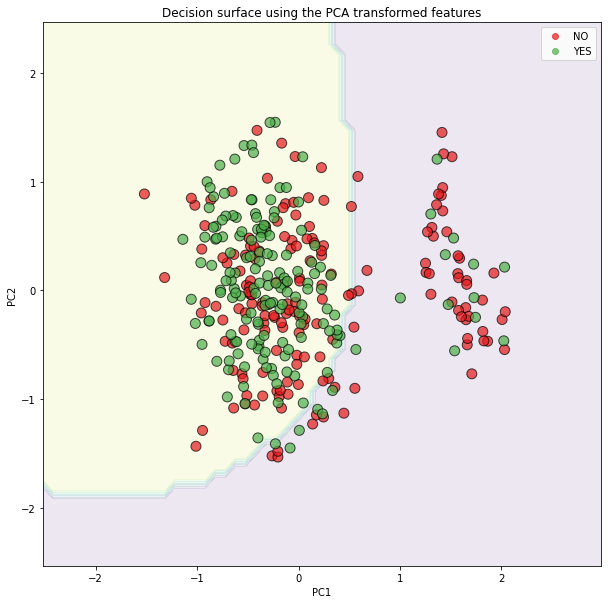

In [ ]:
import matplotlib.colors as colors
z=clf_svm.predict(np.column_stack((xx.ravel(),yy.ravel())))
z=z.reshape(xx.shape)
fig,ax=plt.subplots(figsize=(10,10))
ax.contourf(xx,yy,z,alpha=0.1)
cmap=colors.ListedColormap(['#e41a1c','#4daf4a'])
scatter=ax.scatter(test_pc1_coords,test_pc2_coords,c=y_train_under,cmap=cmap,s=100,edgecolors='k',alpha=0.7)
legend=ax.legend(scatter.legend_elements()[0],scatter.legend_elements()[1],loc='upper right')
legend.get_texts()[0].set_text('NO')
legend.get_texts()[1].set_text('YES')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision surface using the PCA transformed features')
plt.show()